In [11]:
#  tensorflow == 1.13.1
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets

#### TensorflowBasic

In [3]:
# tf test session open
a = tf.add(3,5)
sess = tf.Session()
print(sess.run(a))


8


In [4]:
# session close()
sess.close()

In [6]:
x = 2
y = 3
op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
op3 = tf.pow(op2, op1)

In [7]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)

7776


#### TensorFlow_Regression_보스턴 땅값 예측

In [13]:
# data 불러오기
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data,y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [14]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b # model

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Varialbes 초기화
    
    for step in range(10000) :
        sess.run(train)
        if step % 1000 == 0 :
                print('Step {}: w {} b {}'.format(step,sess.run(w), sess.run(b)))
                print('loss {}'.format(sess.run(loss)))
                print('\n')
    
    w_out, b_out = sess.run([w,b])
    
    
    

Step 0: w [0.3080829] b [-1.2562784]
loss 514.6905517578125


Step 1000: w [0.3772459] b [12.445969]
loss 156.37705993652344


Step 2000: w [-0.12940197] b [20.884865]
loss 83.55116271972656


Step 3000: w [-0.44265667] b [26.10254]
loss 55.71138381958008


Step 4000: w [-0.63633555] b [29.32852]
loss 45.06901168823242


Step 5000: w [-0.7560847] b [31.323101]
loss 41.00065994262695


Step 6000: w [-0.83012307] b [32.55631]
loss 39.445430755615234


Step 7000: w [-0.8759005] b [33.318794]
loss 38.85089874267578


Step 8000: w [-0.9042038] b [33.79022]
loss 38.623626708984375


Step 9000: w [-0.9217037] b [34.08171]
loss 38.53673553466797




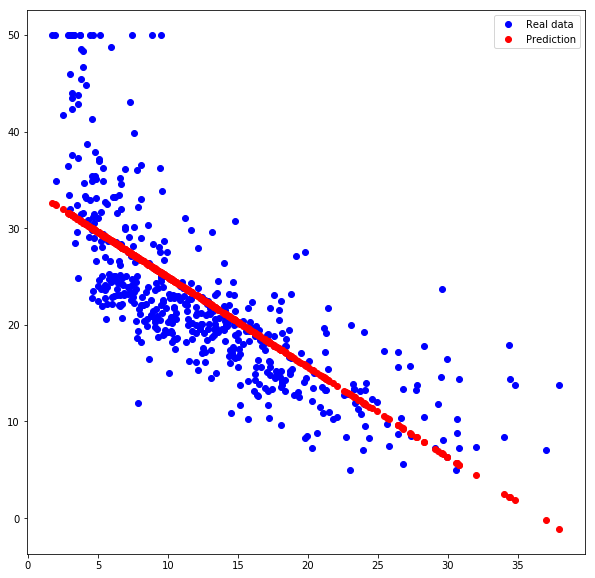

In [22]:
plt.figure(figsize = (10,10))
plt.plot(x_data,y_data, 'bo', label = 'Real data')
plt.plot(x_data, x_data* w_out + b_out,'ro', label = 'Prediction')
plt.legend()
plt.show()

#### 예측값을 더 유연하게 시도 1 , GradientDescentOptimizer

In [64]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets

In [25]:
#Prepare the data 
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data,y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [27]:
# Build the model , GradientDescentOptimizer 사용

_x_data = tf.reshape(x_data, [len(x_data),1]) # _x_data 를 행렬로 만들기위해 리스트형식은 안돌아감
# [] 안에 은닉층 설정 
W = tf.Variable(tf.random_normal([1,5], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([5,1],dtype = tf.float64))

hidden = tf.nn.sigmoid(tf.matmul(_x_data,W))
output = tf.matmul(hidden,W_out)

In [35]:
# Set the criterion : Cost function & Gradient Descent method
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [42]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #tf.Variable 초기화(파라미터 세터 초기화)
    
    for step in range(50000):
        sess.run(train) #실제로 gradient decent가 시작되는 부분
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))
    
    output = sess.run(output)

Step 0 || Loss : 622.8677885526464
Step 5000 || Loss : 84.43527413054092
Step 10000 || Loss : 84.43008962053042
Step 15000 || Loss : 84.42756104302045
Step 20000 || Loss : 84.42604584563101
Step 25000 || Loss : 84.4250300586742
Step 30000 || Loss : 84.42429879980604
Step 35000 || Loss : 84.42374571023461
Step 40000 || Loss : 84.42331189636404
Step 45000 || Loss : 84.42296201363008


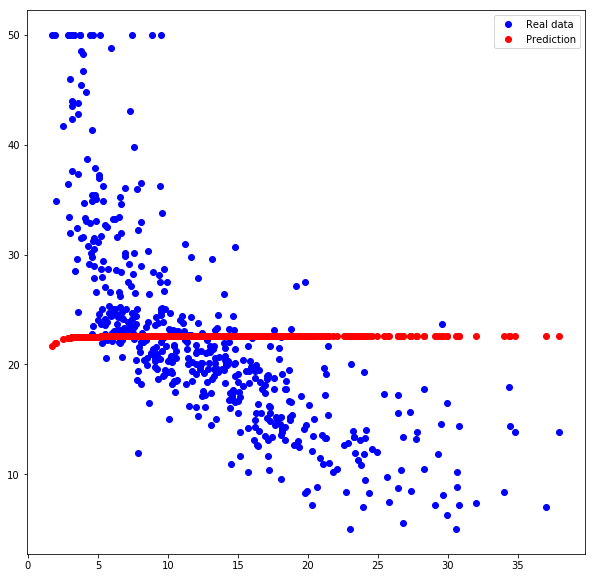

In [46]:
plt.figure(figsize = (10,10))
plt.plot(x_data,y_data, 'bo', label = 'Real data')
plt.plot(x_data,output,'ro', label = 'Prediction')
plt.legend()
plt.show()

#### 예측값을 더 유연하게 시도2  : AdamOptimizer 사용

In [65]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets

In [48]:
#Prepare the data 
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data,y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [60]:
# Build the model , AdamOptimizer 사용

_x_data = tf.reshape(x_data, [len(x_data),1]) # _x_data 를 행렬로 만들기위해 리스트형식은 안돌아감
_y_data = tf.reshape(y_data, [len(y_data),1])

W1 = tf.Variable(tf.random_normal([1,5], dtype = tf.float64))
W2 = tf.Variable(tf.random_normal([5,10], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([10,1],dtype = tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data,W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1,W2))
output = tf.matmul(hidden2,W_out)

In [61]:
# Set the criterion : Cost function & Gradient Descent method
loss = tf.losses.mean_squared_error(output, _y_data)
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

In [62]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #tf.Variable 초기화(파라미터 세터 초기화)
    
    for step in range(50000):
        sess.run(train) #실제로 gradient decent가 시작되는 부분
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))
    
    output = sess.run(output)

Step 0 || Loss : 2332.4443359375
Step 5000 || Loss : 27.937915802001953
Step 10000 || Loss : 26.154752731323242
Step 15000 || Loss : 26.09418487548828
Step 20000 || Loss : 26.007583618164062
Step 25000 || Loss : 25.982467651367188
Step 30000 || Loss : 25.973310470581055
Step 35000 || Loss : 25.966960906982422
Step 40000 || Loss : 25.96283531188965
Step 45000 || Loss : 25.959705352783203


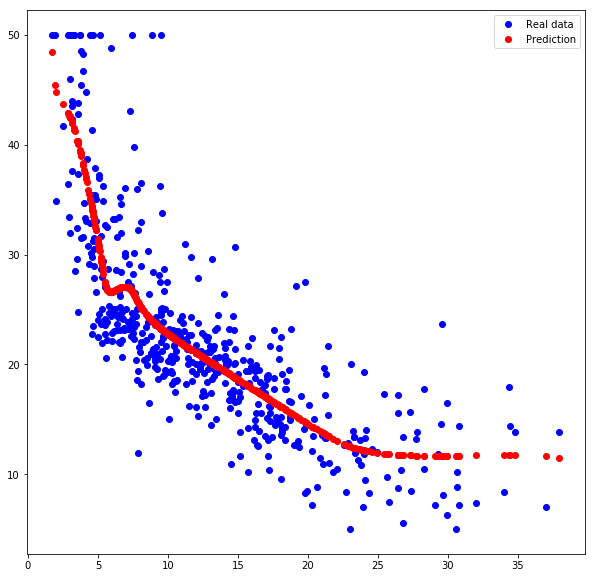

In [63]:
plt.figure(figsize = (10,10))
plt.plot(x_data,y_data, 'bo', label = 'Real data')
plt.plot(x_data,output,'ro', label = 'Prediction')
plt.legend()
plt.show()